<div style="text-align: left; background-color:black; font-family: Trebuchet MS; color:#70e000; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: black solid;"> Movie Genre Classification  </div>

**We are going to predict the genre of the movie based on the plot/summary of the film.**

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk.corpus import stopwords# to remove stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
import os
for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset\description.txt
dataset\test_data.txt
dataset\test_data_solution.txt
dataset\train_data.txt


In [4]:
#our data is separated by ::: there's also \n for new lines 
df_train = pd.read_csv('dataset/train_data.txt',sep=' ::: ',header=None,engine='python', names=['Title','Genre','Description'])
df_train

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his doc...
2,Cupid (1997),thriller,A brother and sister with a past incestuous re...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fiel...
4,The Secret Sin (1915),drama,To help their unemployed father make ends meet...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-rec...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on B...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The siste...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about gr..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and have...


In [5]:
print(df_train.info())
print(df_train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB
None
Title          0
Genre          0
Description    0
dtype: int64


# Explanatory Data Analysis

**I tried checking which genre of movies are the most produced.**

<Axes: title={'center': 'Genre Count in the Dataset'}, xlabel='Genre', ylabel='Count'>

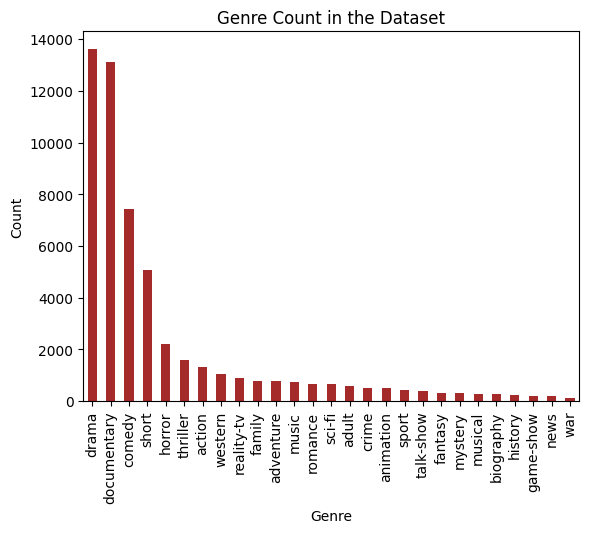

In [6]:
genre_cnt = df_train["Genre"].value_counts()
plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Genre Count in the Dataset")
genre_cnt.plot(kind='bar',color='brown')

In [8]:
import warnings
warnings.filterwarnings('ignore')

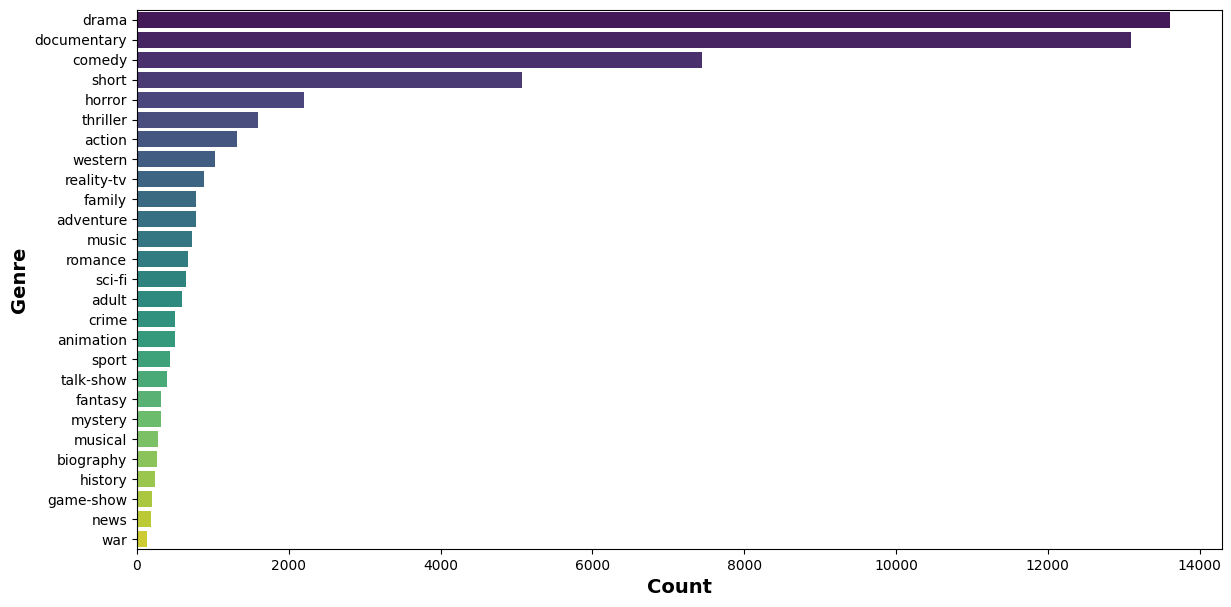

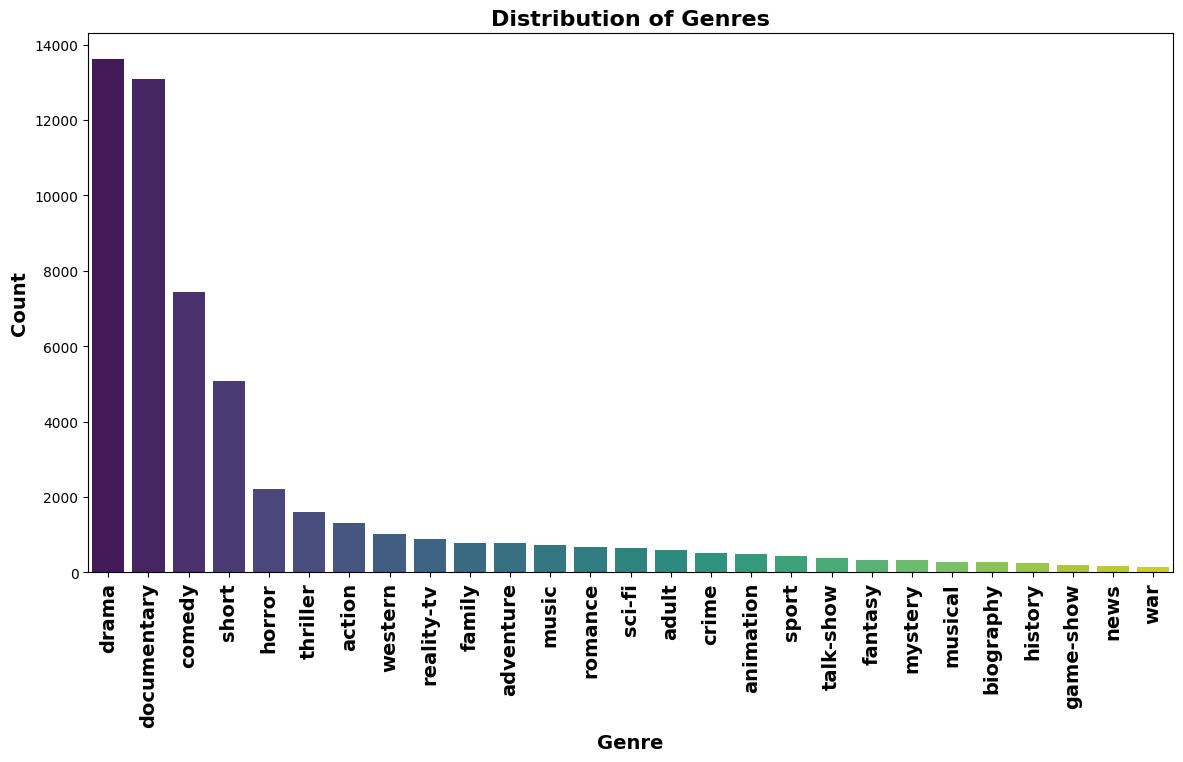

In [9]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=df_train, y='Genre', order=df_train['Genre'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')

# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = df_train['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

**I found that 'drama', 'documentary' and 'comedy' were the most popular genres**

**I also tried checking if there was some relation between the title length of the movie and its corresponding genre**

Text(0.5, 1.0, 'Title length distribution')

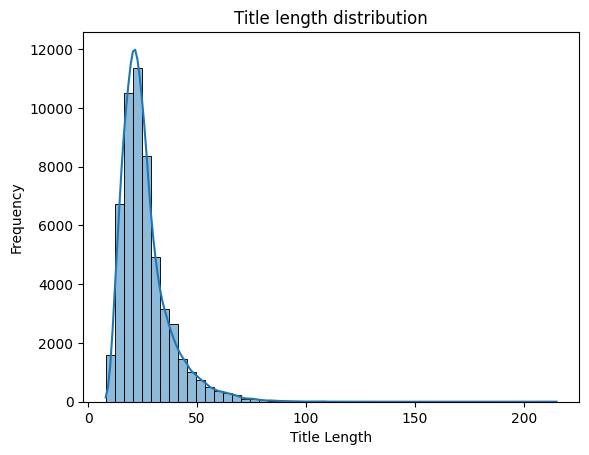

In [10]:
#genre and title length correlation
df_train['title_length'] = df_train['Title'].apply(len)
#popular title lengths
sns.histplot(data=df_train,x='title_length',bins=50,kde=True)
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.title("Title length distribution")
#20 is popular

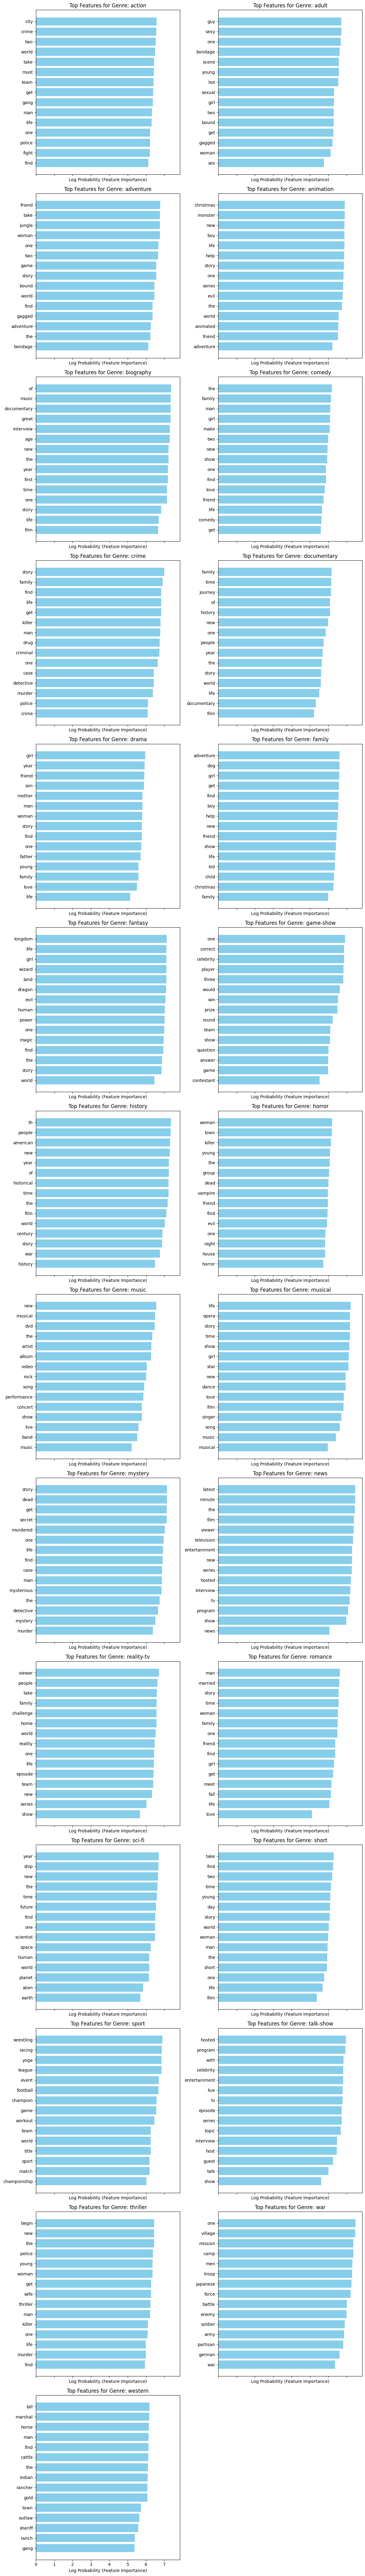

In [47]:
from sklearn.naive_bayes import MultinomialNB

# Step 2: Data Preprocessing
X_text = df_train['Title'] + ' ' + df_train['Description']  # Combine 'Title' and 'Description'
y = df_train['Genre']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Step 4: Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features based on your dataset
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 5: Model Selection and Training
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

# Plot feature importance for all genres with positive values
feature_names = tfidf_vectorizer.get_feature_names_out()
class_labels = classifier.classes_
feature_importance = {}

# Collect log probabilities for each feature in each class
for i, label in enumerate(class_labels):
    feature_importance[label] = classifier.feature_log_prob_[i]

# Set up subplots
num_classes = len(class_labels)
num_plots_per_row = 2
num_rows = -(-num_classes // num_plots_per_row)  # Ceiling division
fig, axes = plt.subplots(nrows=num_rows, ncols=num_plots_per_row, figsize=(12, 6*num_rows), sharex=True)
N=15

# Plot top features for each class
for i, label in enumerate(class_labels):
    row, col = divmod(i, num_plots_per_row)
    sorted_idx = feature_importance[label].argsort()[::-1]
    top_features = [feature_names[idx] for idx in sorted_idx[:N]]
    
    axes[row, col].barh(range(N), abs(feature_importance[label][sorted_idx][:N]), align="center", color='skyblue')
    axes[row, col].set_yticks(range(N))
    axes[row, col].set_yticklabels(top_features)
    axes[row, col].set_xlabel("Log Probability (Feature Importance)")
    axes[row, col].set_title(f"Top Features for Genre: {label}")

# Remove empty subplots
for i in range(num_classes, num_rows * num_plots_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [37]:
# Get the feature names (words) from the TF-IDF vectorizer
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the log probabilities for each feature for each class
log_probs = classifier.feature_log_prob_

# Identify the top N informative words for each genre
N = 10
for i, genre in enumerate(classifier.classes_):
    print(f"\nTop {N} words for {genre} genre:")
    top_words_idx = log_probs[i, :].argsort()[-N:][::-1]
    top_words = [feature_names[idx] for idx in top_words_idx]
    print(", ".join(top_words))



Top 10 words for action genre:
find, fight, police, one, life, man, gang, get, team, must

Top 10 words for adult genre:
sex, woman, gagged, get, bound, two, girl, sexual, hot, young

Top 10 words for adventure genre:
bondage, the, adventure, gagged, find, world, bound, story, game, two

Top 10 words for animation genre:
adventure, friend, animated, world, the, evil, series, one, story, help

Top 10 words for biography genre:
film, life, story, one, time, first, year, the, new, age

Top 10 words for comedy genre:
get, comedy, life, friend, love, find, one, show, new, two

Top 10 words for crime genre:
crime, police, murder, detective, case, one, criminal, drug, man, killer

Top 10 words for documentary genre:
film, documentary, life, world, story, the, year, people, one, new

Top 10 words for drama genre:
life, love, family, young, father, one, find, story, woman, man

Top 10 words for family genre:
family, christmas, child, kid, life, show, friend, new, help, boy

Top 10 words for fa

# **TEXT PREPROCESSING**

The main focus here is to clean and prepare our data set for further processing. I focused on the plot description since we predict on the basis of plot.

In [11]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/working/')
   # command = "unzip /working/corpora/wordnet.zip -d working/corpora"
    #subprocess.run(command.split())
    nltk.data.path.append('/working/')

# Now can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /working/...
[nltk_data]   Package wordnet is already up-to-date!


Imported NLTK for stopwords and lemmatization purposes.

Here, I have used a separate function which does all the stuff from converting plot text to lowercase, removing every non-alphabetic characters except space, removing stopwords and lastly lemmatization to reduce words in their base forms.

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [13]:
lemmatizer = WordNetLemmatizer()

stopwords_set = set(stopwords.words('english'))
def text_prep(text):
    c_text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    c_text = c_text.lower()
    tokens = c_text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_set]
    return " ".join(tokens)
df_train['Description']=df_train['Description'].apply(text_prep)
df_train

,Title,Genre,Description,title_length
1,Oscar et la dame rose (2009),drama,listening conversation doctor parent yearold o...,28
2,Cupid (1997),thriller,brother sister past incestuous relationship cu...,12
3,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...,32
4,The Secret Sin (1915),drama,help unemployed father make end meet edith twi...,21
5,The Unrecovered (2007),drama,film title refers unrecovered body ground zero...,22
...,...,...,...,...
54210,"""Bonino"" (1953)",comedy,shortlived nbc live sitcom centered bonino wor...,15
54211,Dead Girls Don't Cry (????),horror,next generation exploitation sister kapa bay s...,27
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,ze bestaan echt standup comedy growing facing ...,41
54213,Make Your Own Bed (1944),comedy,walter vivian live country difficult time keep...,24


# Term Frequency - Inverse Document Frequency (TF-IDF)

I used this statistical method to measure how important a word was within its plot relative to within all the movie plots.It assigns higher values to words that are unique to specific movies while downweighting common words.

In [14]:
v = TfidfVectorizer()
transformed_output=v.fit_transform(df_train['Description'])

Firstly, we split the training data into further training and test data 8:2

In [15]:
from sklearn.model_selection import train_test_split
y=df_train["Genre"]
X=transformed_output
X_train, X_test, y_train,y_test = train_test_split(
X,y,test_size=0.2,random_state=1)

NOW, we move towards different ensembling models. We will use the model with the higher accuracy for our actual test cases.

# Random Forest Classifier

Using TF-IDF-transformed features it predicts the genre of movies combining multiple decision tress.

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20,random_state = 42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf= rf.predict(X_test)
accuracy_train_rf = accuracy_score(y_train,y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test,y_pred_test_rf)
print(f"Accuracy of train : {accuracy_train_rf}")
print(f"Accuracy of test : {accuracy_test_rf}")

Accuracy of train : 0.9979018237993129
Accuracy of test : 0.4636170801438716


# Naive Bayes Classifier

It is a probabilistic classfication algorithm 

Since these algorithms expect a numerical value, we have encoded different labels for different genres.

In [17]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

y_train=lab_enc.fit_transform(y_train)
y_test=lab_enc.transform(y_test)

In [18]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [19]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_train = nb.predict(X_train)
y_pred_test= nb.predict(X_test)
accuracy_train_nb = accuracy_score(y_train,y_pred_train)
accuracy_test_nb = accuracy_score(y_test,y_pred_test)
print(f"Accuracy of train : {accuracy_train_nb}")
print(f"Accuracy of test : {accuracy_test_nb}")
# print(classification_report(y_test,y_pred_test,zero_division=1))

Accuracy of train : 0.46427336238500383
Accuracy of test : 0.4422207876049064


# Logistic Regression Classifier

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)
# Transforming numerical labels back to genres
y_pred_train_genre = lab_enc.inverse_transform(y_pred_train_lr)
y_pred_train_genre = lab_enc.inverse_transform(y_pred_test_lr)

accuracy_train_lr=accuracy_score(y_train,y_pred_train_lr)
accuracy_test_lr=accuracy_score(y_test,y_pred_test_lr)
print(f"Accuracy of train : {accuracy_train_lr}")
print(f"Accuracy of test : {accuracy_test_lr}")

Accuracy of train : 0.7164925872126536
Accuracy of test : 0.5766854191644379


# ANN

In [33]:
from sklearn.neural_network import MLPClassifier

# Create and train the ANN model
ann = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)
ann.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(50,), random_state=42)

In [34]:
y_pred_train_ann = ann.predict(X_train)
y_pred_test_ann = ann.predict(X_test)
# Transforming numerical labels back to genres
y_pred_train_genre = lab_enc.inverse_transform(y_pred_train_ann)
y_pred_train_genre = lab_enc.inverse_transform(y_pred_test_ann)

accuracy_train_ann=accuracy_score(y_train,y_pred_train_ann)
accuracy_test_ann=accuracy_score(y_test,y_pred_test_ann)
print(f"Accuracy of train : {accuracy_train_ann}")
print(f"Accuracy of test : {accuracy_test_ann}")

Accuracy of train : 0.9995158054921491
Accuracy of test : 0.557502536198469


Logistic Regression Classifier gave us the most highest accuracy among others. So we'll use this classifier to predict other movies.

In [35]:
Evaluation = pd.DataFrame({'Naive Bayes Model': [accuracy_train_nb],
                           'Logistic Regression Model':[accuracy_train_lr],
                          'Random Forest Model' :[accuracy_train_rf],
                          'Artificial Neural Network':[accuracy_train_ann]}, index=['Accuracy'])
Evaluation

,Naive Bayes Model,Logistic Regression Model,Random Forest Model,Artificial Neural Network
Accuracy,0.464273,0.716493,0.997902,0.999516


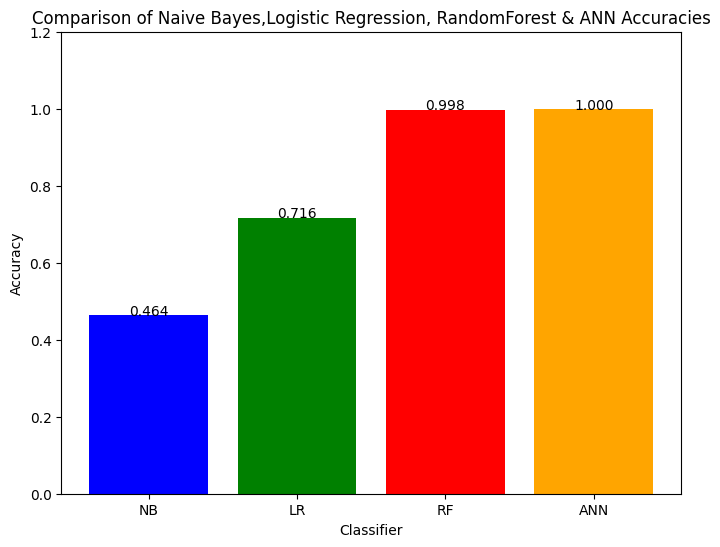

In [61]:
classifiers = ['NB', 'LR', 'RF', 'ANN']
accuracies = [accuracy_train_nb, accuracy_train_lr,accuracy_train_rf, accuracy_train_ann]

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['blue', 'green', 'red', 'orange'])
plt.title('Comparison of Naive Bayes,Logistic Regression, RandomForest & ANN Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.ylim(0, 1.2)  # Setting y-axis limit for better visualization
for i, acc in enumerate(accuracies):
    plt.text(i, acc , f'{acc:.3f}', ha='center')

plt.show()

# Evaluation of the provided test data

In [27]:
df_test = pd.read_csv('dataset/test_data.txt',sep=" ::: ",header=None,engine='python',names=['Name','Description'])

In [28]:
df_test['Description']=df_test['Description'].apply(text_prep)
df_test

,Name,Description
1,Edgar's Lunch (1998),lr brane love life car apartment job especiall...
2,La guerra de papá (1977),spain march quico naughty child three belongin...
3,Off the Beaten Track (2010),one year life albin family shepherd north tran...
4,Meu Amigo Hindu (2015),father died hasnt spoken brother year serious ...
5,Er nu zhai (1955),known internationally martial art superstar br...
...,...,...
54196,"""Tales of Light & Dark"" (2013)",covering multiple genre tale light dark anthol...
54197,Der letzte Mohikaner (1965),alice cora munro attempt find father british o...
54198,Oliver Twink (2007),movie year making oliver twist artful dodger f...
54199,Slipstream (1973),popular mysterious rock dj mike mallard askew ...


In [29]:
X_tfidf_test= v.transform(df_test['Description'])
X_tfidf_test

<54200x136051 sparse matrix of type '<class 'numpy.float64'>'
	with 2518265 stored elements in Compressed Sparse Row format>

In [30]:
X_tfidf_test.shape

(54200, 136051)

In [31]:
y_predicted = lr.predict(X_tfidf_test)
y_predicted_genre=lab_enc.inverse_transform(y_predicted)
df_test['Predicted Genre']= y_predicted_genre
test_data_solution = pd.read_csv('dataset/test_data_solution.txt',sep = ' ::: ',header=None,engine='python',names=['Title','Genre','Description'])
df_test['Actual Genre']= test_data_solution['Genre']


random_rows = df_test.sample(n=7)
random_rows

,Name,Description,Predicted Genre,Actual Genre
9571,"First 100 Animals, Bugs and Fish (2016)",parent teacher want child good reader fundamen...,short,family
8947,The Revenge of the Crooked Claw (1998),crooked claw hatched another plan world domina...,adventure,adventure
49198,Encounters of the Fourth Kind (1989),documentary based best selling book communion ...,documentary,sci-fi
54114,"The 25,000 Mile Love Story (2013)",swiss endurance athlete serge roethelis thirst...,documentary,documentary
22498,The Knackery (2009),set near future knackery latest hard hitting f...,reality-tv,horror
16671,Kate: Her Story (2009),kate gosselin husband jon eight child become i...,documentary,reality-tv
19653,Crisis Function Awakening (2018),living grid chicago trying unlock secret life ...,drama,action


In [32]:
accuracy_predicted = accuracy_score(test_data_solution['Genre'],y_predicted_genre)
print(f"Accuracy of the test data : {accuracy_predicted}")

Accuracy of the test data : 0.5800738007380074


In [54]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 2: Data Preprocessing
X_text = df_train['Title'] + ' ' + df_train['Description']  # Combine 'Title' and 'Description'
y = df_train['Genre']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Create a LabelEncoder and fit it on the original labels
lab_enc = LabelEncoder()
y_train_encoded = lab_enc.fit_transform(y_train)  # Fit and transform on training labels

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Define classifiers
rf = RandomForestClassifier(n_estimators=20, random_state=42)
nb = MultinomialNB()
lr = LogisticRegression(max_iter=1000)
ann = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)

# Create a pipeline for each classifier
rf_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', rf)
])

nb_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', nb)
])

lr_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', lr)
])

ann_pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('classifier', ann)
])

# Train and evaluate each pipeline
classifiers = {
    'Random Forest': rf_pipeline,
    'Naive Bayes': nb_pipeline,
    'Logistic Regression': lr_pipeline,
    'Artificial Neural Network': ann_pipeline
}

scores = {}  # Dictionary to store accuracy scores

for clf_name, pipeline in classifiers.items():
    # Train the model
    pipeline.fit(X_train, y_train_encoded)
    
    # Make predictions
    y_pred_train_encoded = pipeline.predict(X_train)
    y_pred_test_encoded = pipeline.predict(X_test)
    
    # Transform numerical labels back to genres (only for unique classes)
    y_pred_train_genre = lab_enc.inverse_transform(y_pred_train_encoded)  # Inverse transform on training predictions
    y_pred_test_genre = lab_enc.inverse_transform(y_pred_test_encoded)  # Inverse transform on test predictions
    
    # Evaluate the model
    accuracy_train = accuracy_score(y_train, y_pred_train_genre)
    accuracy_test = accuracy_score(y_test, y_pred_test_genre)
    
    scores[clf_name] = {'train': accuracy_train, 'test': accuracy_test}

# Print the final scores
for clf_name, score in scores.items():
    print(f"Classifier: {clf_name}")
    print(f"Accuracy on train set: {score['train']}")
    print(f"Accuracy on test set: {score['test']}")
    print("---------------------------")

Classifier: Random Forest
Accuracy on train set: 0.9979248806806391
Accuracy on test set: 0.4819699345199668
---------------------------
Classifier: Naive Bayes
Accuracy on train set: 0.5519125683060109
Accuracy on test set: 0.5212579544406529
---------------------------
Classifier: Logistic Regression
Accuracy on train set: 0.678540960549676
Accuracy on test set: 0.5874757908327953
---------------------------
Classifier: Artificial Neural Network
Accuracy on train set: 0.9999308293560213
Accuracy on test set: 0.5092686525869224
---------------------------
